# ENGR 424 Machine Learning Project

 Name: Yousif Robeil<br>
 ID: 23-00076

## Project Description
This is a project for the class Machine Learning ENGR 424. The Aim of the project is to predict daily mean temperature of Argentina

<br><br><br><br><br>

## Machine Learning Pipeline

1. Importing the data
2. Plotting the data with distribution and descriptive statistics
3. Splitting the Data for Training, and Testing, will do 70-30 split (17 years for training, 7 years for testing)
4. Normalization/Standardization with minmax scaler
5. Feature engineering, check for frequency features and pca and autocorrelation 
6. Model Training and Testing
7. Prediction intervals
<br><br><br>

### Variable Index:

In [13]:
"""
1- Data:  containing the original imported Data. Data frame
2- Data_copy: Copy of imported data, this is the variable that will be manipulated. Data frame
3- Y: This represents the target variable with date as index. Data frame
4- fig, axs: creating instances for subplots
5- avg_mean_temp: the average of the daily mean temperature. float
6- Train_Cent: the percentage of Training data with respect to total data. float
7- Vald_Cent: the percentage of Validation data with respect to total data. float
8- Test_Cent: the percentage of Testing data with respect to total data. float
9- Data_Size: The size of the data. int 
10- Train_Lim: The index where Training data stop. int
11- Vald_Lim: The index where Validation data stop. int
12- Test_Lim: The index where Testing data stop. int
13- Data_Train: Splitting Data into Training Data. Data frame
14- Data_Vald: Splitting Data into Validation Data. Data frame
15- Data_Test: Splitting Data into Testing Data. Data frame
16- Train_Temp_Max: The daily Max Temp feature of the Training data. Data frame
16- Test_Temp_Max: The daily Max Temp feature of the Testing data. Data frame
17- Train_Temp_Min: The daily Min Temp feature of the Training data. Data frame
17- Test_Temp_Min: The daily Min Temp feature of the Testing data. Data frame
18- Train_Temp_Mean: The daily Mean Temp feature of the Training data. Data frame
18- Test_Temp_Mean: The daily Mean Temp feature of the Testing data. Data frame
19- Train_Prec_Sum: The daily Precipitation Sum feature of the Training data. Data frame
19- Test_Prec_Sum: The daily Precipitation Sum feature of the Testing data. Data frame
20- Train_Windsp_Max: The daily Max Windspeed feature of the Training data. Data frame
20- Test_Windsp_Max: The daily Max Windspeed feature of the Testing data. Data frame
21- Train_Windgu_Max: The daily Max Windgusts feature of the Training data. Data frame
21- Test_Windgu_Max: The daily Max Windgusts feature of the Testing data. Data frame
22- Train_Sunsh_Dur: The daily Sunshine Duration feature of the Training data. Data frame
23- Test_Sunsh_Dur: The daily Sunshine Duration feature of the Testing data. Data frame
"""

'\n1- Data:  containing the original imported Data. Data frame\n2- Data_copy: Copy of imported data, this is the variable that will be manipulated. Data frame\n3- Y: This represents the target variable with date as index. Data frame\n4- fig, axs: creating instances for subplots\n5- avg_mean_temp: the average of the daily mean temperature. float\n6- Train_Cent: the percentage of Training data with respect to total data. float\n7- Vald_Cent: the percentage of Validation data with respect to total data. float\n8- Test_Cent: the percentage of Testing data with respect to total data. float\n9- Data_Size: The size of the data. int \n10- Train_Lim: The index where Training data stop. int\n11- Vald_Lim: The index where Validation data stop. int\n12- Test_Lim: The index where Testing data stop. int\n13- Data_Train: Splitting Data into Training Data. Data frame\n14- Data_Vald: Splitting Data into Validation Data. Data frame\n15- Data_Test: Splitting Data into Testing Data. Data frame\n16- Train_

### 1. Importing the data:


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data = pd.read_csv("ML Project/Argentina_weather_data.csv")
Data_copy = Data.copy()
Data_copy.drop("Country",axis=1,inplace=True)
Data_copy['Date'] = pd.to_datetime(Data_copy['Date'],format='%d-%m-%Y')
Data_copy.set_index(Data_copy['Date'], inplace=True)
Data_copy.drop("Date",axis=1,inplace=True)

Y = Data_copy[["Temp_Max","Temp_Mean", "Temp_Min"]]
print(Data_copy.head())

            Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  Windspeed_Max  \
Date                                                                          
2000-01-01      33.9      20.7       27.5                0.0           17.9   
2000-01-02      32.9      22.2       27.3                0.6           23.1   
2000-01-03      32.1      21.0       26.9                0.0           20.6   
2000-01-04      32.2      20.9       26.7                0.0           25.1   
2000-01-05      30.5      21.0       25.7                0.0           23.7   

            Windgusts_Max  Sunshine_Duration  
Date                                          
2000-01-01           32.8           49047.75  
2000-01-02           43.6           48969.22  
2000-01-03           40.7           48921.57  
2000-01-04           47.2           48091.20  
2000-01-05           45.4           48922.09  


<br><br><br>

### 2. Plotting the data with distribution and descriptive statistics and Time Series Decomposition

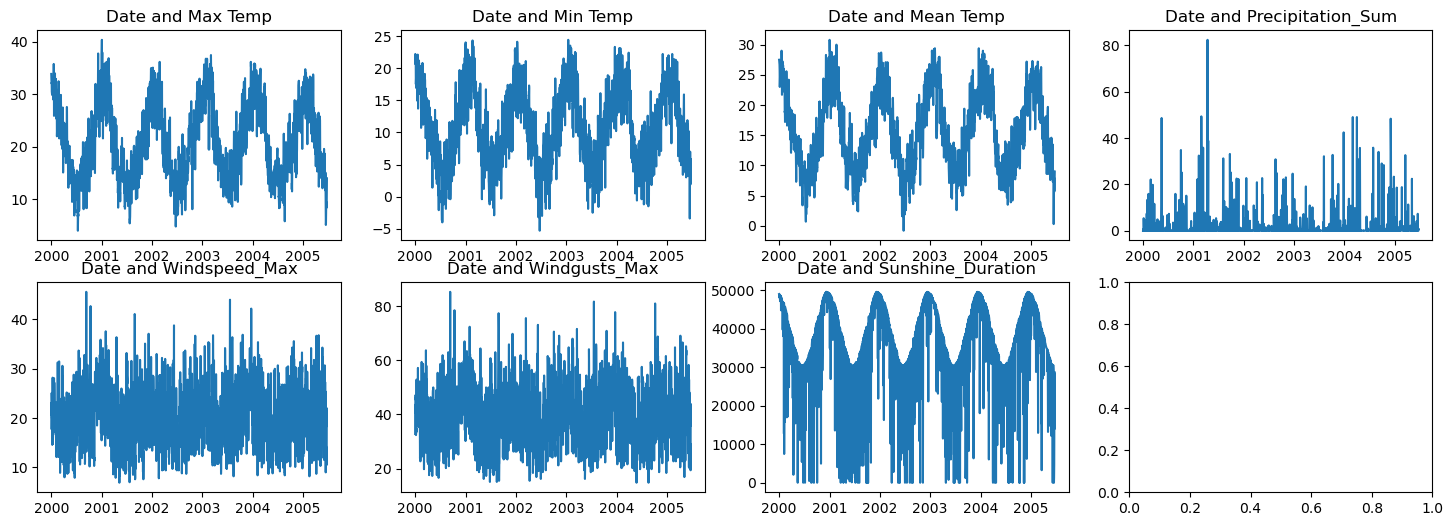

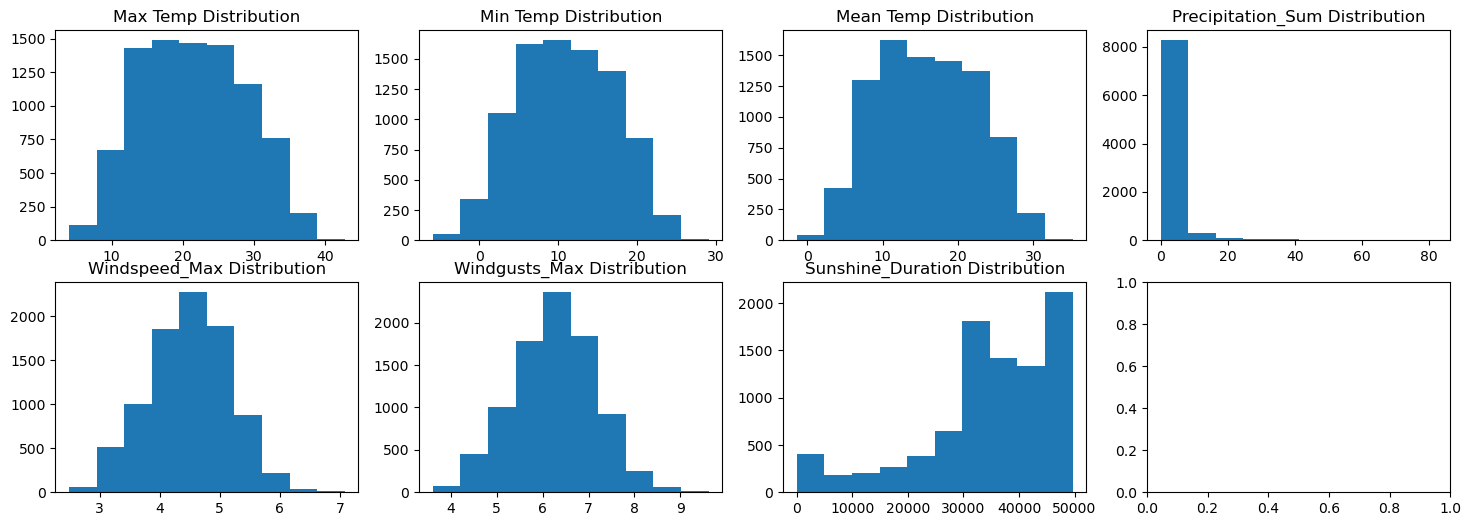

          Temp_Max     Temp_Min    Temp_Mean  Precipitation_Sum  \
count  8766.000000  8766.000000  8766.000000        8766.000000   
mean     21.448517    10.953091    15.938182           1.491901   
std       7.252082     6.082416     6.583756           5.078362   
min       4.000000    -5.900000    -1.400000           0.000000   
25%      15.600000     6.200000    10.600000           0.000000   
50%      21.300000    10.800000    15.700000           0.000000   
75%      27.100000    15.700000    21.300000           0.300000   
max      42.700000    29.100000    35.200000          82.300000   

       Windspeed_Max  Windgusts_Max  Sunshine_Duration  
count    8766.000000    8766.000000        8766.000000  
mean       20.689014      40.117305       34615.274984  
std         6.114128      11.261959       12322.007295  
min         6.200000      13.000000           0.000000  
25%        16.300000      32.000000       30437.920000  
50%        20.500000      39.600000       36156.110000

In [18]:
# Plotting the data
fig, axs = plt.subplots(2, 4, figsize=(18, 6))

axs[0,0].set_title("Date and Max Temp")
axs[0,0].plot(Data_copy["Temp_Max"].iloc[0:2000])

axs[0,1].set_title("Date and Min Temp")
axs[0,1].plot(Data_copy["Temp_Min"].iloc[0:2000])

axs[0,2].set_title("Date and Mean Temp")
axs[0,2].plot(Data_copy["Temp_Mean"].iloc[0:2000])


axs[0,3].set_title("Date and Precipitation_Sum")
axs[0,3].plot(Data_copy["Precipitation_Sum"].iloc[0:2000])

axs[1,0].set_title("Date and Windspeed_Max")
axs[1,0].plot(Data_copy["Windspeed_Max"].iloc[0:2000])


axs[1,1].set_title("Date and Windgusts_Max")
axs[1,1].plot(Data_copy["Windgusts_Max"].iloc[0:2000])


axs[1,2].set_title("Date and Sunshine_Duration")
axs[1,2].plot(Data_copy["Sunshine_Duration"].iloc[0:2000])


plt.show()
print("\n\n\n\n")
# Plotting the distribution
fig, axs = plt.subplots(2, 4, figsize=(18, 6))


axs[0,0].set_title("Max Temp Distribution")
axs[0,0].hist(Data_copy["Temp_Max"], 10)

axs[0,1].set_title("Min Temp Distribution")
axs[0,1].hist(Data_copy["Temp_Min"], 10)

axs[0,2].set_title("Mean Temp Distribution")
axs[0,2].hist(Data_copy["Temp_Mean"], 10)


axs[0,3].set_title("Precipitation_Sum Distribution")
axs[0,3].hist(Data_copy["Precipitation_Sum"], 10)

axs[1,0].set_title("Windspeed_Max Distribution")
axs[1,0].hist(np.sqrt(Data_copy["Windspeed_Max"]), 10) # sqrt of the feature was considered because the original has skewed normal distribution


axs[1,1].set_title("Windgusts_Max Distribution")
axs[1,1].hist(np.sqrt(Data_copy["Windgusts_Max"]), 10) # sqrt of the feature was considered because the original has skewed normal distribution


axs[1,2].set_title("Sunshine_Duration Distribution")
axs[1,2].hist(Data_copy["Sunshine_Duration"], 10)

plt.show()


# Descriptive Statistics

avg_mean_temp = Data_copy.describe()
print(avg_mean_temp)


<br><br><br>

### 3. Splitting the Data for Training, Testing, will do 70-30 in case of splits

In [21]:
Train_Cent = 70/100
Test_Cent = 30/100
Data_Size = Data_copy.shape[0]
print(f"Data Size is: {Data_Size}")

Train_Lim = int(Train_Cent * Data_Size)

Test_Lim = int(Train_Lim + Test_Cent * Data_Size)


print("----------------------------------------------------------------------------------------------------")
Data_Train = Data_copy.iloc[0:Train_Lim,:]
print(f"Training Data End:\n{Data_Train.tail()}\n\n")
Data_Test = Data_copy.iloc[Train_Lim:Test_Lim,:]
print(f"Testing Data End:\n{Data_Test.tail()}")
print("----------------------------------------------------------------------------------------------------")



Data Size is: 8766
----------------------------------------------------------------------------------------------------
Training Data End:
            Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  Windspeed_Max  \
Date                                                                          
2016-10-14      17.1      10.1       13.5               14.2           12.3   
2016-10-15      20.6      12.8       16.0                0.0           19.8   
2016-10-16      14.6      12.0       13.2                7.7           15.9   
2016-10-17      16.3       9.2       12.8                0.0           14.9   
2016-10-18      15.1       9.9       11.6                5.6           24.5   

            Windgusts_Max  Sunshine_Duration  
Date                                          
2016-10-14           46.4            2710.07  
2016-10-15           38.5           27193.51  
2016-10-16           36.4            6994.48  
2016-10-17           28.1            9579.52  
2016-10-18           47.9

<br><br><br>

### 3.1 Partitioning The Training Data for processing

In [24]:
# Partitioning the data into date feature pairs for processing

# Temp_Max
Train_Temp_Max = pd.DataFrame({"Temp_Max": Data_Train["Temp_Max"]})
Train_Temp_Max.set_index(Data_Train.index, inplace=True)
Test_Temp_Max = pd.DataFrame({"Temp_Max": Data_Test["Temp_Max"]})
Test_Temp_Max.set_index(Data_Test.index, inplace=True)
Test_Temp_Max.head()
#-------------------------------------------------------------------------------------------------------------------

# Temp_Min
Train_Temp_Min = pd.DataFrame({"Temp_Min": Data_Train["Temp_Min"]})
Train_Temp_Min.set_index(Data_Train.index, inplace=True)
Test_Temp_Min = pd.DataFrame({"Temp_Min": Data_Test["Temp_Min"]})
Test_Temp_Min.set_index(Data_Test.index, inplace=True)
Train_Temp_Min.head()
#-------------------------------------------------------------------------------------------------------------------

# Temp_Mean
Train_Temp_Mean = pd.DataFrame({"Temp_Mean": Data_Train["Temp_Mean"]})
Train_Temp_Mean.set_index(Data_Train.index, inplace=True)

Test_Temp_Mean = pd.DataFrame({"Temp_Mean": Data_Test["Temp_Mean"]})
Test_Temp_Mean.set_index(Data_Test.index, inplace=True)

Train_Temp_Mean.head()
#-------------------------------------------------------------------------------------------------------------------

# Precipitaiton_Sum
Train_Prec_Sum = pd.DataFrame({"Precipitation_Sum": Data_Train["Precipitation_Sum"]})
Train_Prec_Sum.set_index(Data_Train.index, inplace=True)
Test_Prec_Sum = pd.DataFrame({"Precipitation_Sum": Data_Test["Precipitation_Sum"]})
Test_Prec_Sum.set_index(Data_Test.index, inplace=True)

Train_Prec_Sum.head()
#-------------------------------------------------------------------------------------------------------------------

# Windspeed_Max
Train_Windsp_Max = pd.DataFrame({"Windspeed_Max": np.sqrt(Data_Train["Windspeed_Max"])})
Train_Windsp_Max.set_index(Data_Train.index, inplace=True)
Test_Windsp_Max = pd.DataFrame({"Windspeed_Max": np.sqrt(Data_Test["Windspeed_Max"])})
Test_Windsp_Max.set_index(Data_Test.index, inplace=True)

Train_Windsp_Max.head()
#-------------------------------------------------------------------------------------------------------------------


# Windgusts_Max
Train_Windgu_Max = pd.DataFrame({"Windgusts_Max": np.sqrt(Data_Train["Windgusts_Max"])})
Train_Windgu_Max.set_index(Data_Train.index, inplace=True)
Test_Windgu_Max = pd.DataFrame({"Windgusts_Max": np.sqrt(Data_Test["Windgusts_Max"])})
Test_Windgu_Max.set_index(Data_Test.index, inplace=True)

Train_Windgu_Max.head()
#-------------------------------------------------------------------------------------------------------------------

#Sunshine_Duration
Train_Sunsh_Dur = pd.DataFrame({"Sunshine_Duration":Data_Train["Sunshine_Duration"]})
Train_Sunsh_Dur.set_index(Data_Train.index, inplace=True)
Test_Sunsh_Dur = pd.DataFrame({"Sunshine_Duration":Data_Test["Sunshine_Duration"]})
Test_Sunsh_Dur.set_index(Data_Test.index, inplace=True)

Train_Sunsh_Dur.head()
#-------------------------------------------------------------------------------------------------------------------







Sunshine_Duration
Date                         
2000-01-01           49047.75
2000-01-02           48969.22
2000-01-03           48921.57
2000-01-04           48091.20
2000-01-05           48922.09

<br><br><br>

<br><br><br>

### 5. Compiling Processed Data

In [28]:
Clean_Training_Data = pd.DataFrame({"Temp_Max":Train_Temp_Max["Temp_Max"], "Temp_Min":Train_Temp_Min["Temp_Min"], "Temp_Mean":Train_Temp_Mean["Temp_Mean"], "Precipitation_Sum":Train_Prec_Sum["Precipitation_Sum"], "Windspeed_Max":Train_Windsp_Max["Windspeed_Max"], "Windgusts_Max":Train_Windgu_Max["Windgusts_Max"] , "Sunshine_Duration":Train_Sunsh_Dur["Sunshine_Duration"] }) 
Train_Temp_Min.set_index(Data_Train.index, inplace=True)
Clean_Testing_Data = pd.DataFrame({"Temp_Max":Test_Temp_Max["Temp_Max"], "Temp_Min":Test_Temp_Min["Temp_Min"], "Temp_Mean":Test_Temp_Mean["Temp_Mean"], "Precipitation_Sum":Test_Prec_Sum["Precipitation_Sum"], "Windspeed_Max":Test_Windsp_Max["Windspeed_Max"], "Windgusts_Max":Test_Windgu_Max["Windgusts_Max"] , "Sunshine_Duration":Test_Sunsh_Dur["Sunshine_Duration"] }) 
Test_Temp_Min.set_index(Data_Test.index, inplace=True)

Clean_Training_Data.head()



Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  Windspeed_Max  \
Date                                                                          
2000-01-01      33.9      20.7       27.5                0.0       4.230839   
2000-01-02      32.9      22.2       27.3                0.6       4.806246   
2000-01-03      32.1      21.0       26.9                0.0       4.538722   
2000-01-04      32.2      20.9       26.7                0.0       5.009990   
2000-01-05      30.5      21.0       25.7                0.0       4.868265   

            Windgusts_Max  Sunshine_Duration  
Date                                          
2000-01-01       5.727128           49047.75  
2000-01-02       6.603030           48969.22  
2000-01-03       6.379655           48921.57  
2000-01-04       6.870226           48091.20  
2000-01-05       6.737952           48922.09

<br><br><br>

### 6. Normalization/Standardization z-score or minmax scaler

In [31]:

from sklearn.preprocessing import MinMaxScaler
# Putting Data in a 0 to 1 scale to prevent feature dominance

scaler={}
for i in Clean_Training_Data.columns:
    if i == "Date":
        continue
    scaler[i] = MinMaxScaler() 
    Clean_Training_Data[i] = scaler[i].fit_transform(pd.DataFrame(Clean_Training_Data[i]))

Clean_Training_Data.head()

# Same for Testing Data

for i in Clean_Testing_Data.columns:
    if i == "Date":
        continue

    Clean_Testing_Data[i] = scaler[i].transform(pd.DataFrame(Clean_Testing_Data[i]))

Clean_Testing_Data.head()


# Descriptive Statistics
dsc = Clean_Testing_Data.describe()
print(dsc)


          Temp_Max     Temp_Min    Temp_Mean  Precipitation_Sum  \
count  2629.000000  2629.000000  2629.000000        2629.000000   
mean      0.477465     0.517064     0.516018           0.016770   
std       0.198280     0.183477     0.195114           0.058148   
min       0.032520     0.045593     0.053097           0.000000   
25%       0.317073     0.370821     0.356932           0.000000   
50%       0.471545     0.510638     0.510324           0.000000   
75%       0.631436     0.656535     0.669617           0.002430   
max       1.048780     1.063830     1.079646           0.780073   

       Windspeed_Max  Windgusts_Max  Sunshine_Duration  
count    2629.000000    2629.000000        2629.000000  
mean        0.447999       0.453530           0.698406  
std         0.148411       0.152092           0.246321  
min         0.069900       0.022697           0.000000  
25%         0.345309       0.353801           0.603280  
50%         0.451319       0.457377           0.733597

### 7. Feature engineering, check for frequency features and pca and autocorrelation

Correlation matrix is : 
                   Temp_Max  Temp_Min  Temp_Mean  Precipitation_Sum  \
Temp_Max           1.000000  0.891688   0.973623          -0.011033   
Temp_Min           0.891688  1.000000   0.964662           0.155585   
Temp_Mean          0.973623  0.964662   1.000000           0.063516   
Precipitation_Sum -0.011033  0.155585   0.063516           1.000000   
Windspeed_Max      0.215511  0.271027   0.246980           0.080962   
Windgusts_Max      0.245306  0.307539   0.281017           0.123511   
Sunshine_Duration  0.655633  0.417293   0.570412          -0.340340   

                   Windspeed_Max  Windgusts_Max  Sunshine_Duration  
Temp_Max                0.215511       0.245306           0.655633  
Temp_Min                0.271027       0.307539           0.417293  
Temp_Mean               0.246980       0.281017           0.570412  
Precipitation_Sum       0.080962       0.123511          -0.340340  
Windspeed_Max           1.000000       0.954000           0.1

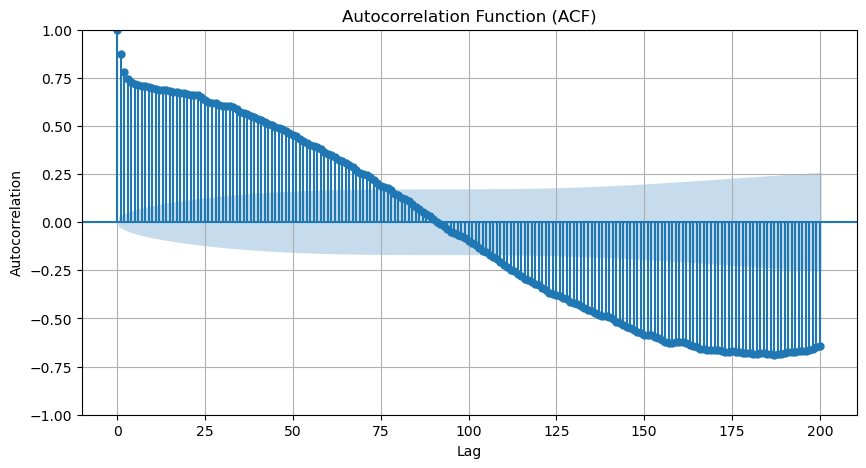

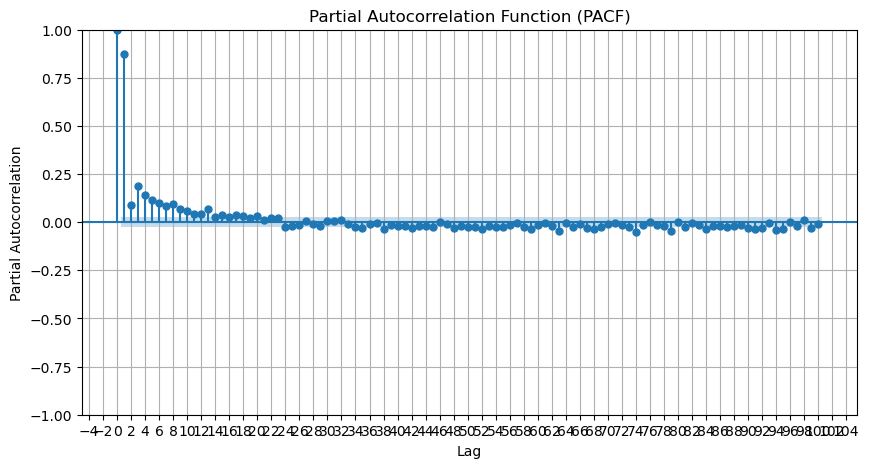

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


matrix = Clean_Training_Data.corr()
print("Correlation matrix is : ")
print(matrix)


"""
Applying ACF and PACF

ACF determines the window for moving average, which is the data point where the last point that crosses the significance boundary (the area shaded with white blue) 
PACF determines the lag features
"""

# Plot the ACF

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Clean_Training_Data["Temp_Min"], lags=200, ax=ax) # Plot first 200 lags
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation Function (ACF)")
plt.grid()
plt.show() # Display the plot

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(Clean_Training_Data["Temp_Min"], lags=100, ax=ax, method='ywm') # Plot first 200 lags
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.grid()
plt.show() # Display the plot




#### 7.1 Feature Extraction

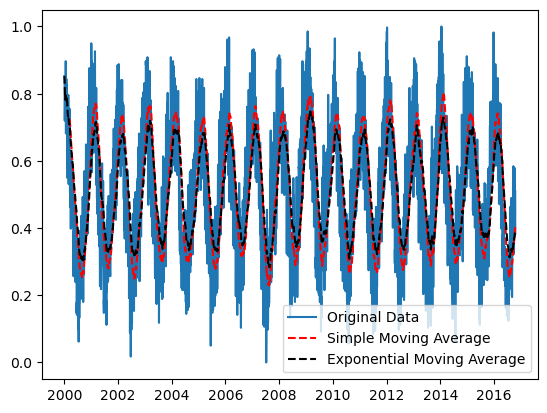

In [35]:
"""
Extracting Lag Features
We have 3 target variables, Temp_Mean
For each target variable, we will have Features Data Frame
"""

#-------------------------------------------------------------------------------------------------------------------

windowsize = 74
Temp_Mean_Features = pd.DataFrame({

                                  "Temp_Max-1":Clean_Training_Data["Temp_Max"].shift(1),
                                  "Temp_Min":Clean_Training_Data["Temp_Min"],
                                  "Windspeed_Max-1":Clean_Training_Data["Windspeed_Max"].shift(1),
                                  "Windgusts_Max-1":Clean_Training_Data["Windgusts_Max"].shift(1),
                                  "Sunshine_Duration-1":Clean_Training_Data["Sunshine_Duration"].shift(1),
                                  "Lag_1":Clean_Training_Data["Temp_Mean"].shift(1),
                                  "Lag_2":Clean_Training_Data["Temp_Mean"].shift(2),
                                  "Lag_3":Clean_Training_Data["Temp_Mean"].shift(3),
                                  "Lag_5":Clean_Training_Data["Temp_Mean"].shift(5),
                                  "SMA":Clean_Training_Data["Temp_Mean"].rolling(window=windowsize).mean(),
                                  "EMA":Clean_Training_Data["Temp_Mean"].ewm(halflife=f"{windowsize/2} days", times=Clean_Training_Data.index).mean()
                                 })

Temp_Mean_Features.set_index(Clean_Training_Data.index, inplace=True)




Test_Temp_Mean_Features = pd.DataFrame({

                                  "Temp_Max-1":Clean_Testing_Data["Temp_Max"].shift(1),
                                  "Temp_Min":Clean_Testing_Data["Temp_Min"],
                                  "Windspeed_Max-1":Clean_Testing_Data["Windspeed_Max"].shift(1),
                                  "Windgusts_Max-1":Clean_Testing_Data["Windgusts_Max"].shift(1),
                                  "Sunshine_Duration-1":Clean_Testing_Data["Sunshine_Duration"].shift(1),
                                  "Lag_1":Clean_Testing_Data["Temp_Mean"].shift(1),
                                  "Lag_2":Clean_Testing_Data["Temp_Mean"].shift(2),
                                  "Lag_3":Clean_Testing_Data["Temp_Mean"].shift(3),
                                  "Lag_5":Clean_Testing_Data["Temp_Mean"].shift(5),
                                  "SMA":Clean_Testing_Data["Temp_Mean"].rolling(window=windowsize).mean(),
                                  "EMA":Clean_Testing_Data["Temp_Mean"].ewm(halflife=f"{windowsize/2} days", times=Clean_Testing_Data.index).mean()
                                 })

Test_Temp_Mean_Features.set_index(Clean_Testing_Data.index, inplace=True)

# Precipitationn sum feature as dropped


#-------------------------------------------------------------------------------------------------------------------



# Date Range is 01-01-2000 to 25-05-2014
Temp_Mean_Features

plt.plot(Clean_Training_Data["Temp_Mean"], label="Original Data")
plt.plot(Temp_Mean_Features["SMA"],linestyle="--", color = "r", label="Simple Moving Average")
plt.plot(Temp_Mean_Features["EMA"],linestyle="--",color = "k", label = "Exponential Moving Average")
plt.legend()

plt.show()


##### Correlation Matrix


 Temp Max: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,3,4,5

 Temp Mean: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,2,3,5

 Temp Min: 

The best moving average window according to ACF: 75
The best Lag features according to PACF: 1,3,4
The peridoicity in the ACF plot indicate high seasonality, and the decay in the amplitude indicate non stationarity


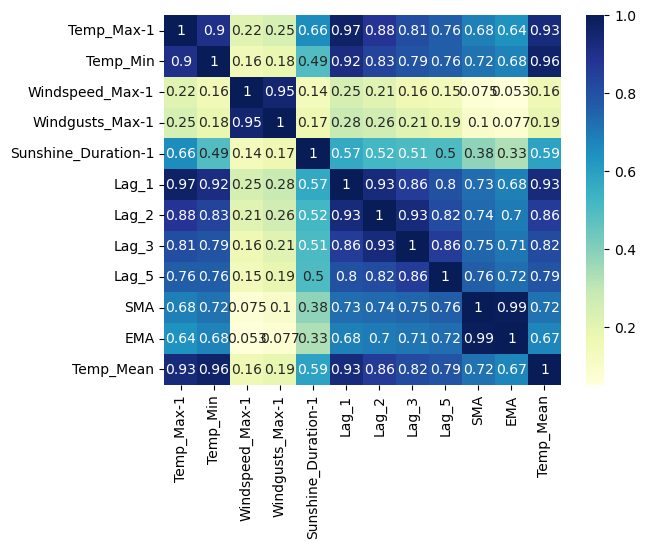

In [37]:
# Plot correlation heatmap
Temp_Mean_Featuresnlabel =Temp_Mean_Features.copy()
Temp_Mean_Featuresnlabel["Temp_Mean"] = Clean_Training_Data["Temp_Mean"].loc[Temp_Mean_Features.index[0]:Temp_Mean_Features.index[-1]]
matrix = Temp_Mean_Featuresnlabel.corr()
sns.heatmap(matrix, cmap="YlGnBu", annot=True)

print(f"\n Temp Max: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,3,4,5")

print(f"\n Temp Mean: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,2,3,5")


print(f"\n Temp Min: \n")
print(f"The best moving average window according to ACF: 75")
print(f"The best Lag features according to PACF: 1,3,4")


print("The peridoicity in the ACF plot indicate high seasonality, and the decay in the amplitude indicate non stationarity")


In [38]:
# Dropping NaNs

Temp_Mean_Features = Temp_Mean_Features.iloc[73:]



Test_Temp_Mean_Features = Test_Temp_Mean_Features.iloc[73:]

#Temp_Mean_Features.tail()
Temp_Mean_Features.drop(["Windspeed_Max-1","Windgusts_Max-1"],axis=1,inplace=True)
Test_Temp_Mean_Features.drop(["Windspeed_Max-1","Windgusts_Max-1"],axis=1,inplace=True)
Temp_Mean_Features.head()


Temp_Max-1  Temp_Min  Sunshine_Duration-1     Lag_1     Lag_2  \
Date                                                                        
2000-03-14    0.555556  0.580547             0.500392  0.637168  0.669617   
2000-03-15    0.547425  0.693009             0.814937  0.584071  0.637168   
2000-03-16    0.476965  0.571429             0.658326  0.607670  0.584071   
2000-03-17    0.441734  0.455927             0.804749  0.542773  0.607670   
2000-03-18    0.512195  0.465046             0.810263  0.507375  0.542773   

               Lag_3     Lag_5       SMA       EMA  
Date                                                
2000-03-14  0.755162  0.684366  0.723910  0.703879  
2000-03-15  0.669617  0.713864  0.720601  0.701513  
2000-03-16  0.637168  0.755162  0.716495  0.697632  
2000-03-17  0.584071  0.669617  0.712070  0.693008  
2000-03-18  0.607670  0.637168  0.708284  0.689521

### 9. Training and Evaluation the Model

R2_score: 0.9583318515386855
Coefficient of Variation: 7.78%
Train MAPE: 6.16%


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


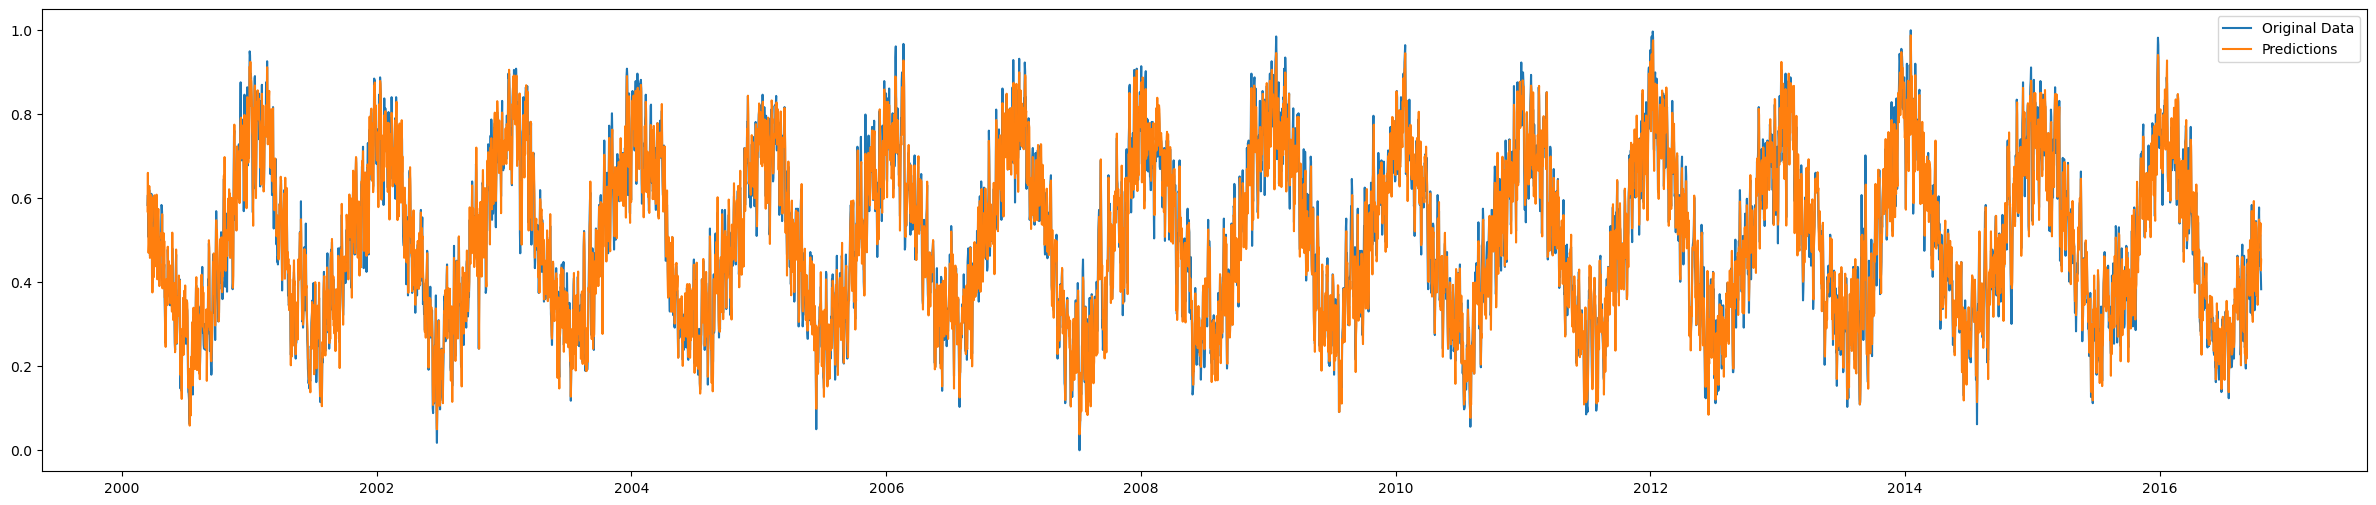

In [40]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # a sklearn library for evaluation metrics, importing R^2 specifically
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tools.eval_measures import rmse

# to go to
#Temp_Mean_Features = Temp_Mean_Features[["Temp_Max", "Temp_Min"]]
X = Temp_Mean_Features # training features


Y = Clean_Training_Data["Temp_Mean"].loc[X.index[0]:X.index[-1]]  #training labels

model = LinearRegression()
model.fit(X, Y)




y_pred = model.predict(X.values.reshape(X.shape[0], -1))
Train_R2_score = r2_score(Y,y_pred)
Train_std= rmse(Y,y_pred)
Train_CV = 100* Train_std/Y.mean()# Coefficient of Variation
Train_MAE = MAE(Y,y_pred)
Train_MAPE = 100*Train_MAE/Y.values.mean()
print(f"R2_score: {Train_R2_score}")
print(f"Coefficient of Variation: {Train_CV:.2f}%")
print(f"Train MAPE: {Train_MAPE:.2f}%")

plt.figure(figsize=(30, 6))
plt.plot(Temp_Mean_Features.index, Y, label = "Original Data")
plt.plot(Temp_Mean_Features.index, y_pred,linestyle="-", label="Predictions")
plt.legend()


R2_score: 0.9604528979410807
Coefficient of Variation: 7.57%
Test MAPE: 5.89%


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


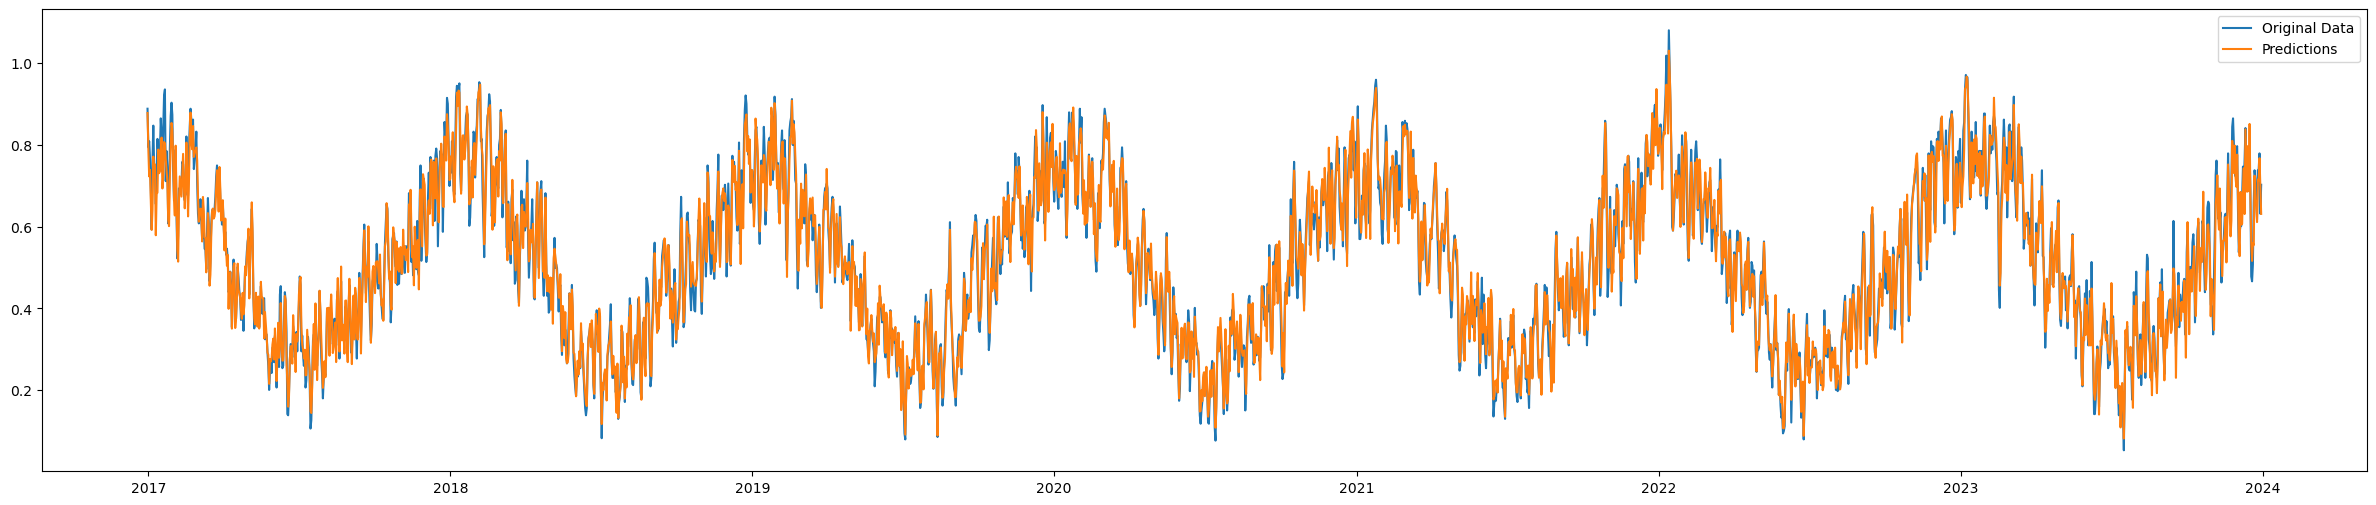

In [41]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # a sklearn library for evaluation metrics, importing R^2 specifically
from sklearn.ensemble import RandomForestRegressor

# to go to

#Test_Temp_Mean_Features = Test_Temp_Mean_Features[["Temp_Max", "Temp_Min"]]
X_Test = Test_Temp_Mean_Features # Testing Features
Y_Test = Clean_Testing_Data["Temp_Mean"].loc[X_Test.index[0]:X_Test.index[-1]]  #testing labels

Test_y_pred = model.predict(X_Test.values.reshape(X_Test.shape[0], -1))
Test_R2_score = r2_score(Y_Test,Test_y_pred )

Test_std= rmse(Y_Test,Test_y_pred)
Test_CV = 100* Test_std/Y_Test.mean()# Coefficient of Variation
Test_MAE = MAE(Y_Test,Test_y_pred)
Test_MAPE = 100*Test_MAE/Y_Test.values.mean()
print(f"R2_score: {Test_R2_score}")
print(f"Coefficient of Variation: {Test_CV:.2f}%")
print(f"Test MAPE: {Test_MAPE:.2f}%")


plt.figure(figsize=(30, 6))
plt.plot(Test_Temp_Mean_Features.index, Y_Test,label="Original Data")
plt.plot(Test_Temp_Mean_Features.index, Test_y_pred,linestyle="-",label="Predictions")
plt.legend()


In [42]:
Y_Test.values.shape

(2556,)

In [43]:
Test_y_pred.shape

(2556,)

<br><br><br>

## Features and Target Variable Correlations 

<Axes: >

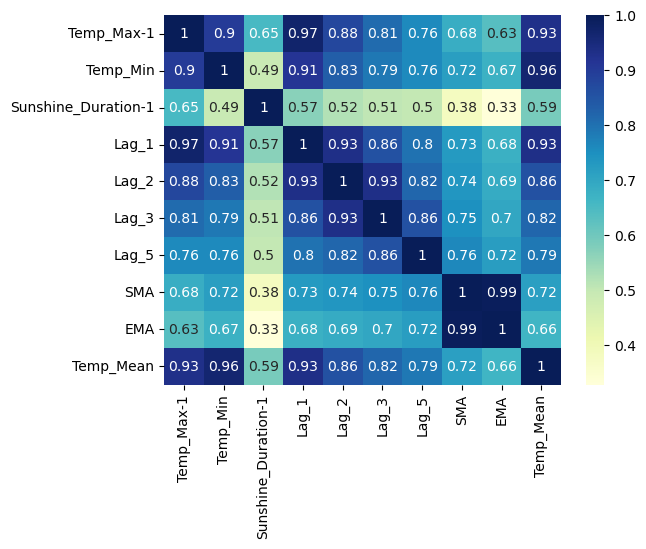

In [46]:
# Visualizing Correlations of features to the target variaable

X_vis = X.copy()
X_vis["Temp_Mean"] = Y
matrix = X_vis.corr()
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)


In [47]:
Test_y_pred.shape
#Test_Temp_Max_Features["Temp_Mean"]

(2556,)

<br><br><br>

## Prediction Intervals

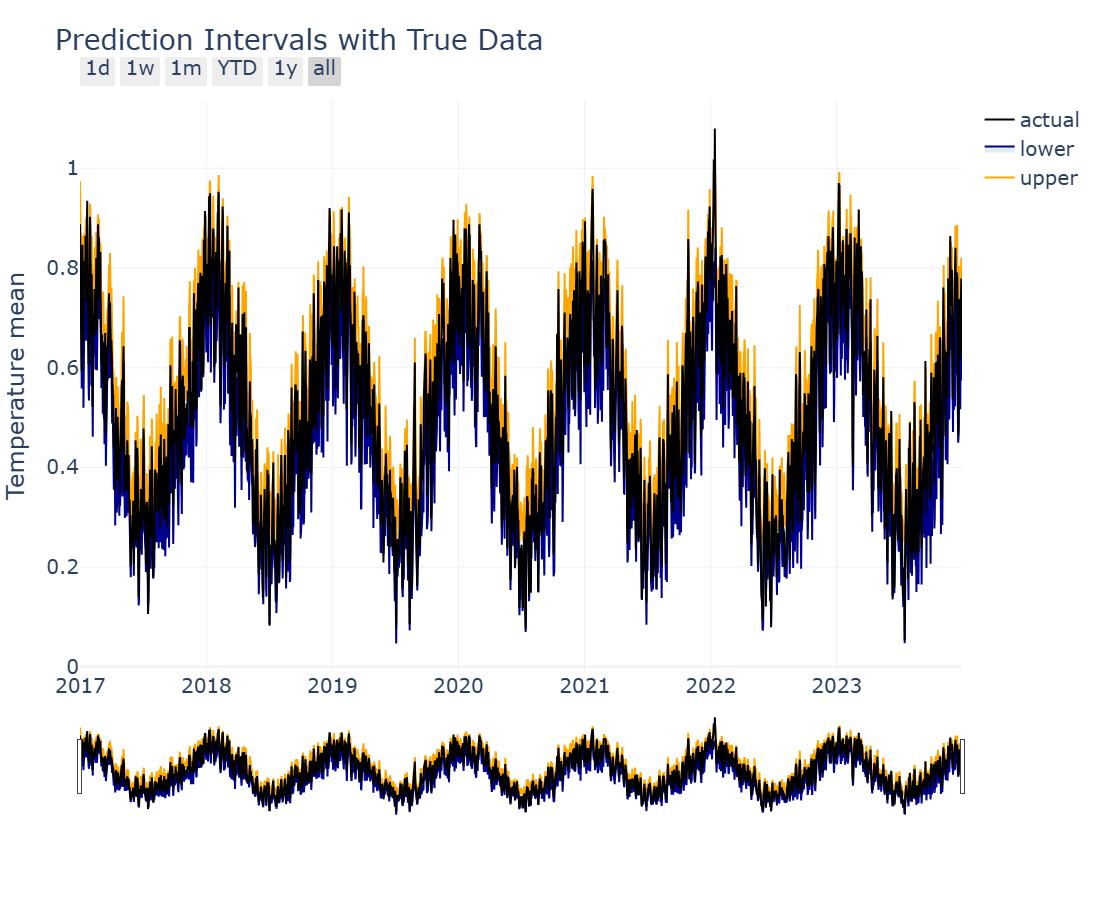

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Data Manipulation
import pandas as pd
import numpy as np


# Modeling
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingRegressor

# File finding
import glob
files = glob.glob('data/*_energy_data.csv')

# Interactivity
from ipywidgets import interact, widgets

# Visualization

# Plotly
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly as px

# cufflinks is a wrapper on plotly
import cufflinks as cf
cf.go_offline(connected=True)

# Prediction intervals 

from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="squared_error")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)


# Fit models
lower_model.fit(X, Y)
mid_model.fit(X, Y)
upper_model.fit(X, Y)
# Record actual values on test set
predictions = pd.DataFrame(Y_Test)
# Predict
predictions['lower'] = lower_model.predict(X_Test)
predictions['mid'] = mid_model.predict(X_Test)
predictions['upper'] = upper_model.predict(X_Test)
predictions


def plot_intervals(predictions, mid=False, start=None, stop=None, title=None):
    """
    Function for plotting prediction intervals as filled area chart.
    
    :param predictions: dataframe of predictions with lower, upper, and actual columns (named for the target)
    :param whether to show the mid prediction
    :param start: optional parameter for subsetting start of predictions
    :param stop: optional parameter for subsetting end of predictions
    :param title: optional string title
    
    :return fig: plotly figure
    """
    # Subset if required
    predictions = (
        predictions.loc[start:stop].copy()
        if start is not None or stop is not None
        else predictions.copy()
    )
    data = []

    # Lower trace will fill to the upper trace
    trace_low = go.Scatter(
        x=predictions.index,
        y=predictions["lower"],
        fill="tonexty",
        line=dict(color="darkblue"),
        fillcolor="rgba(173, 216, 230, 0.4)",
        showlegend=True,
        name="lower",
    )
    # Upper trace has no fill
    trace_high = go.Scatter(
        x=predictions.index,
        y=predictions["upper"],
        fill=None,
        line=dict(color="orange"),
        showlegend=True,
        name="upper",
    )

    # Must append high trace first so low trace fills to the high trace
    data.append(trace_high)
    data.append(trace_low)
    
    if mid:
        trace_mid = go.Scatter(
        x=predictions.index,
        y=predictions["mid"],
        fill=None,
        line=dict(color="green"),
        showlegend=True,
        name="mid",
    )
        data.append(trace_mid)

    # Trace of actual values
    trace_actual = go.Scatter(
        x=predictions.index,
        y=predictions["Temp_Mean"],
        fill=None,
        line=dict(color="black"),
        showlegend=True,
        name="actual",
    )
    data.append(trace_actual)

    # Layout with some customization
    layout = go.Layout(
        height=900,
        width=1400,
        title=dict(text="Prediction Intervals with True Data" if title is None else title),
        yaxis=dict(title=dict(text="Temperature mean")),
        xaxis=dict(
            rangeselector=dict(
                buttons=list(
                    [
                        dict(count=1, label="1d", step="day", stepmode="backward"),
                        dict(count=7, label="1w", step="day", stepmode="backward"),
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(step="all"),
                    ]
                )
            ),
            rangeslider=dict(visible=True),
            type="date",
        ),
    )

    fig = go.Figure(data=data, layout=layout)

    # Make sure font is readable
    fig["layout"]["font"] = dict(size=20)
    fig.layout.template = "plotly_white"
    return fig


# Example plot subsetted to one week
fig = plot_intervals(predictions, start="2008-03-01", stop="2024-03-08")
iplot(fig)


<br><br><br>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Data Manipulation
import pandas as pd
import numpy as np


# Modeling
from sklearn.ensemble import GradientBoostingRegressor

# File finding
import glob
files = glob.glob('data/*_energy_data.csv')

# Interactivity
from ipywidgets import interact, widgets

# Visualization

# Plotly
import plotly.graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly as px

# cufflinks is a wrapper on plotly
import cufflinks as cf
cf.go_offline(connected=True)

# Prediction intervals 

from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="squared_error")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)


# Fit models
lower_model.fit(X, Y)
mid_model.fit(X, Y)
upper_model.fit(X, Y)
# Record actual values on test set
predictions = pd.DataFrame(Y_Test)
predictions["Temp_Mean"]= Test_y_pred
# Predict
predictions['lower'] = lower_model.predict(X_Test)
predictions['mid'] = mid_model.predict(X_Test)
predictions['upper'] = upper_model.predict(X_Test)
predictions


def plot_intervals(predictions, mid=False, start=None, stop=None, title=None):
    """
    Function for plotting prediction intervals as filled area chart.
    
    :param predictions: dataframe of predictions with lower, upper, and actual columns (named for the target)
    :param whether to show the mid prediction
    :param start: optional parameter for subsetting start of predictions
    :param stop: optional parameter for subsetting end of predictions
    :param title: optional string title
    
    :return fig: plotly figure
    """
    # Subset if required
    predictions = (
        predictions.loc[start:stop].copy()
        if start is not None or stop is not None
        else predictions.copy()
    )
    data = []

    # Lower trace will fill to the upper trace
    trace_low = go.Scatter(
        x=predictions.index,
        y=predictions["lower"],
        fill="tonexty",
        line=dict(color="darkblue"),
        fillcolor="rgba(173, 216, 230, 0.4)",
        showlegend=True,
        name="lower",
    )
    # Upper trace has no fill
    trace_high = go.Scatter(
        x=predictions.index,
        y=predictions["upper"],
        fill=None,
        line=dict(color="orange"),
        showlegend=True,
        name="upper",
    )

    # Must append high trace first so low trace fills to the high trace
    data.append(trace_high)
    data.append(trace_low)
    
    if mid:
        trace_mid = go.Scatter(
        x=predictions.index,
        y=predictions["mid"],
        fill=None,
        line=dict(color="green"),
        showlegend=True,
        name="mid",
    )
        data.append(trace_mid)

    # Trace of actual values
    trace_actual = go.Scatter(
        x=predictions.index,
        y=predictions["Temp_Mean"],
        fill=None,
        line=dict(color="black"),
        showlegend=True,
        name="actual",
    )
    data.append(trace_actual)

    # Layout with some customization
    layout = go.Layout(
        height=900,
        width=1400,
        title=dict(text="Prediction Intervals with Predictions" if title is None else title),
        yaxis=dict(title=dict(text="Daily Temperature Mean")),
        xaxis=dict(
            rangeselector=dict(
                buttons=list(
                    [
                        dict(count=1, label="1d", step="day", stepmode="backward"),
                        dict(count=7, label="1w", step="day", stepmode="backward"),
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(step="all"),
                    ]
                )
            ),
            rangeslider=dict(visible=True),
            type="date",
        ),
    )

    fig = go.Figure(data=data, layout=layout)

    # Make sure font is readable
    fig["layout"]["font"] = dict(size=20)
    fig.layout.template = "plotly_white"
    return fig


# Example plot subsetted to one week
fig = plot_intervals(predictions, start="2000-01-01", stop="2024-03-08")
iplot(fig)


Showing that the model is linear

In [54]:
print(f"Model Coefficients: \n{model.coef_}")
print(f"Model bias: \n{model.intercept_}")

Model Coefficients: 
[ 2.00587426e-01  6.99330922e-01  4.98459658e-02  2.60536015e-04
 -9.56796498e-03  2.61628720e-02  4.30616042e-02  5.46594822e-01
 -6.53668699e-01]
Model bias: 
0.04784583215608018


In [55]:
Test_y_pred[-1]

0.6308439702090824

In [56]:
compute= 0
#y_pred = 0.529316*Temp_Max + 0.40109842*Temp_Min+ 0.08712157*Lag_1 + 0.0093784* Lag_5 +0.003955622061119657
for i in range(0,model.coef_.shape[0],1):
    compute =compute + model.coef_[i]*X_Test[X_Test.columns[i]].values[-1] 

compute += model.intercept_
compute

0.6308439702090824

# Linear Regression Assumptions on Testing Data

## 1- Linearity Between the Label and the Features

<Axes: >

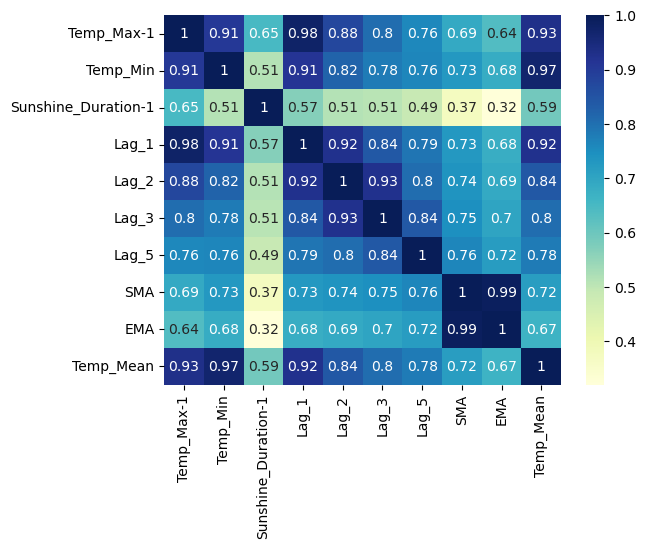

In [59]:
# Visualizing Correlations of features to the target variaable

X_vis2 = X_Test.copy()
X_vis2["Temp_Mean"] = Y_Test
matrix = X_vis2.corr()
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)


The linearity of Features with respect to the model is proven by the $R^2$ value close to 1

## 2- Homoscedacity (constant variance)

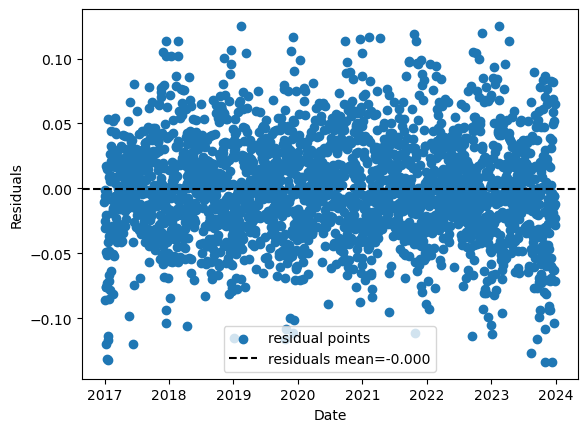

In [62]:
# Residuals plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

residuals = Test_y_pred - Y_Test.values

plt.scatter(Test_Temp_Mean_Features.index[0:3650], residuals[0:3650],label="residual points")
plt.axhline(color='k',linestyle='--',y= residuals.mean(),label=f"residuals mean={residuals.mean():.3f}")
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.legend()

As the mean of the residuals is  zero, it implies homoscedacity.

## 3. Normality of the Residuals

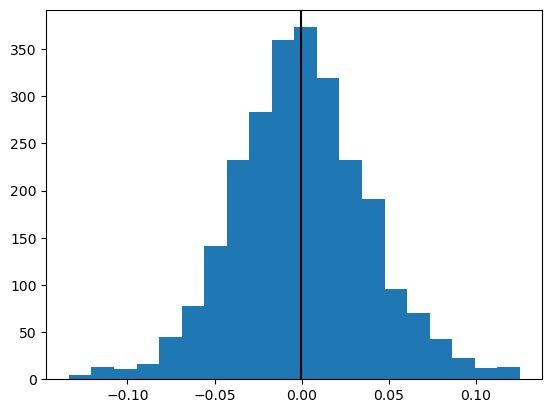

In [65]:
plt.hist(residuals, 20)
plt.axvline(color="k",x=residuals.mean())

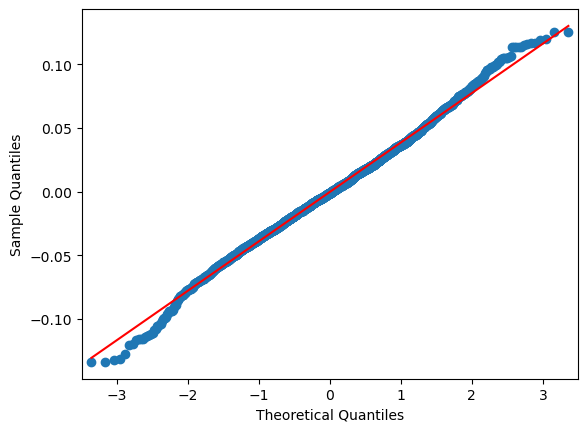

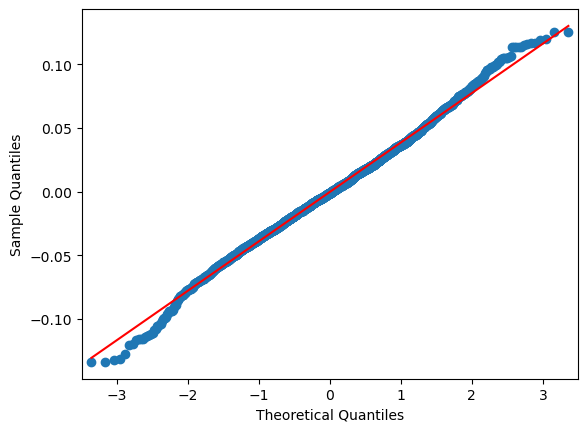

In [66]:
sm.qqplot(residuals, line='s') 


It can be seen that the residuals have normality as the histgram imply a normal distribution and qq plot imply that the normal distribution is neither peaked or skewed

## 4 Residuals have no autocorrelation

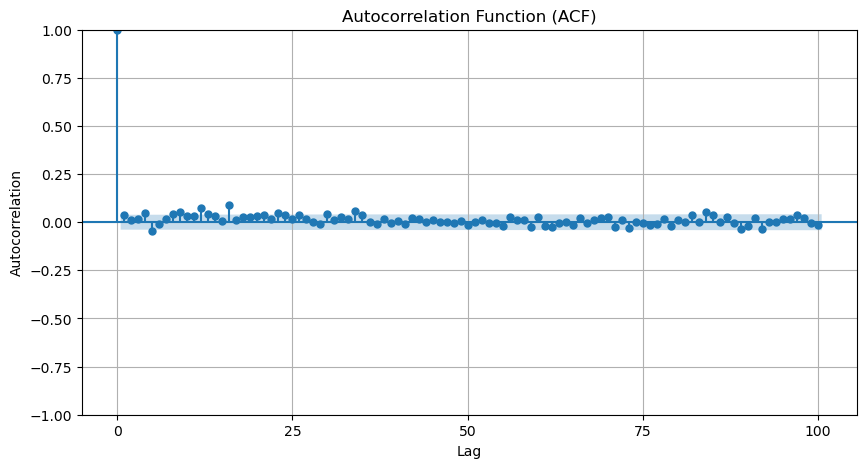

In [69]:

# Plot the ACF

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(residuals, lags=100, ax=ax) # Plot first 200 lags
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation Function (ACF)")
plt.grid()
plt.show() # Display the plot



It can be seen from the acf plot that the residuals have low autocorrelation

## 5 Features shouldn't have multicolliniarity

Not Satisfied

## 6 Features should have no correlation with the residuals

<Axes: >

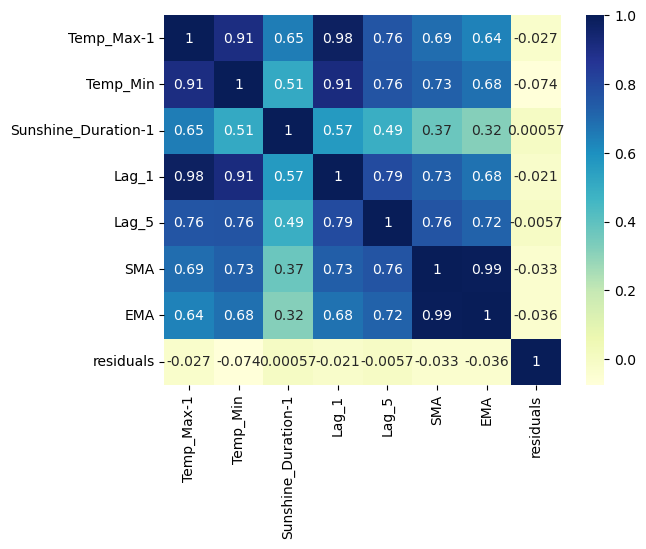

In [74]:
resid_corr = pd.DataFrame({"Temp_Max-1":X_Test["Temp_Max-1"],"Temp_Min":X_Test["Temp_Min"],"Sunshine_Duration-1":X_Test["Sunshine_Duration-1"],"Lag_1":X_Test["Lag_1"],"Lag_5":X_Test["Lag_5"],"SMA":X_Test["SMA"],"EMA":X_Test["EMA"],"residuals":residuals})
matrix = resid_corr.corr()
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)

Features have negligible correlation

Assumptions of Linear Regression are satisfied up to some certainty

Text(0.5, 1.0, 'Predicted vs True values Plot')

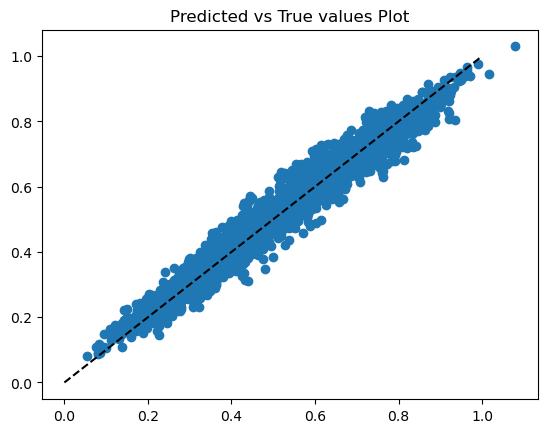

In [77]:
plt.scatter(Y_Test,Test_y_pred)
plt.plot([0,1],color="k",linestyle='--')
plt.title("Predicted vs True values Plot")

# Comparing Assumptions of Linearity in Training Data To Testing Data

## 1- Linearity Between the Label and the Features

<Axes: >

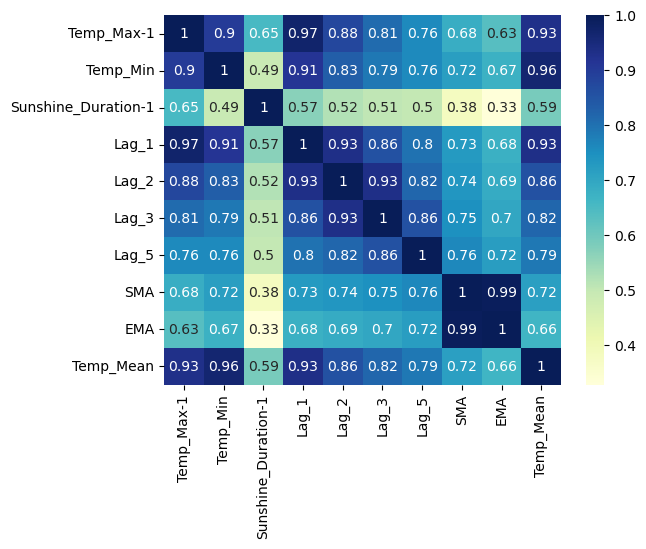

In [80]:
# Visualizing Correlations of features to the target variaable

X_vis = X.copy()
X_vis["Temp_Mean"] = Y
matrix = X_vis.corr()
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)


The linearity of Features with respect to the model is proven by the $R^2$ value close to 1

## 2- Homoscedacity (constant variance)

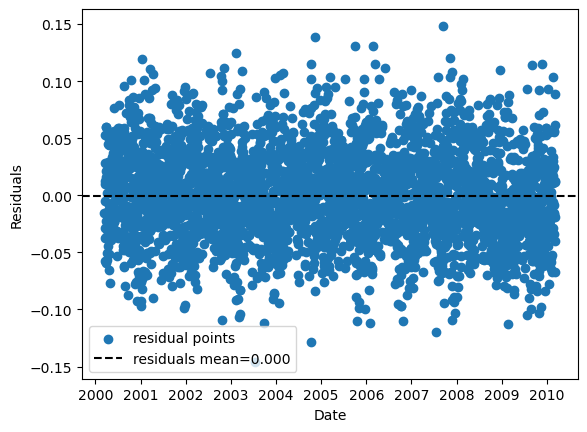

In [83]:
# Residuals plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

residuals2 = y_pred - Y.values

plt.scatter(Temp_Mean_Features.index[0:3650], residuals2[0:3650],label="residual points")
plt.axhline(color='k',linestyle='--',y= residuals.mean(),label=f"residuals mean={residuals2.mean():.3f}")
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.legend()

As the mean of the residuals is  zero, it implies homoscedacity.

In [85]:
residuals2.std()

0.03945067214933751

In [86]:
residuals.std()

0.03876221192535647

## 3. Normality of the Residuals

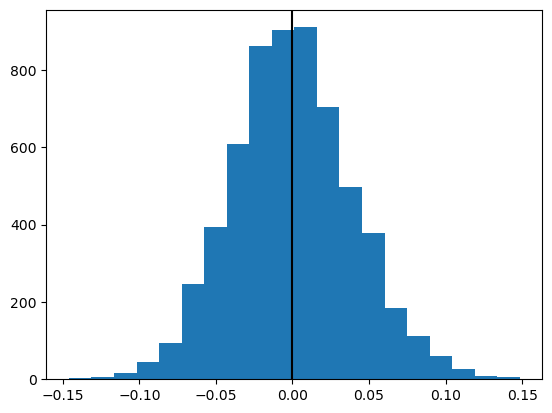

In [88]:
plt.hist(residuals2, 20)
plt.axvline(color="k",x=residuals2.mean())

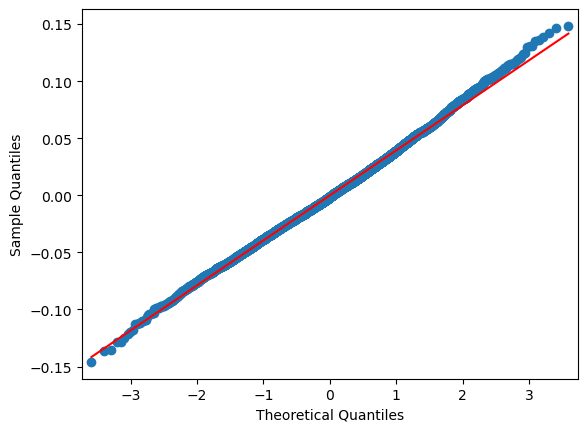

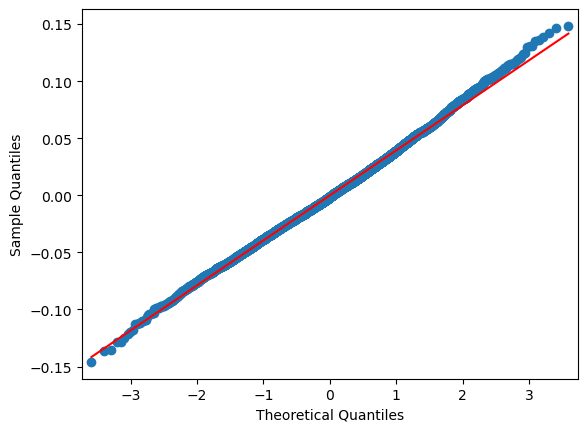

In [89]:
sm.qqplot(residuals2, line='s') 


## 4- Resisduals have no Autocorrelation

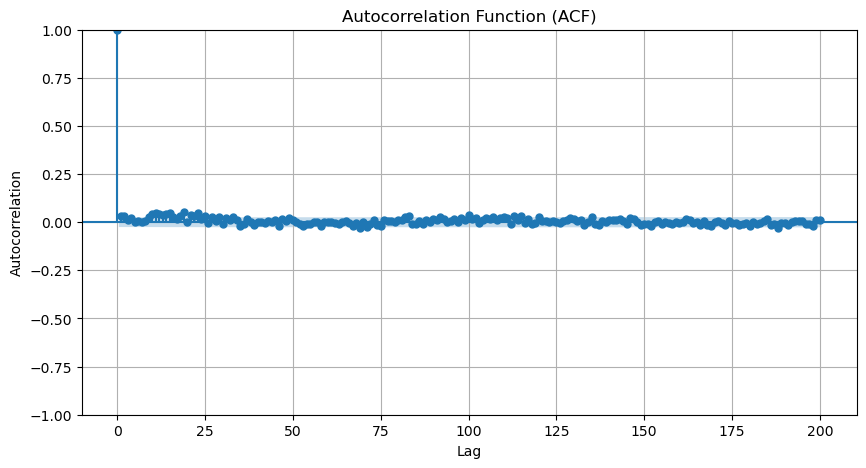

In [91]:

# Plot the ACF

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(residuals2, lags=200, ax=ax) # Plot first 200 lags
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation Function (ACF)")
plt.grid()
plt.show() # Display the plot



## 6 Features should have no correlation with the residuals

<Axes: >

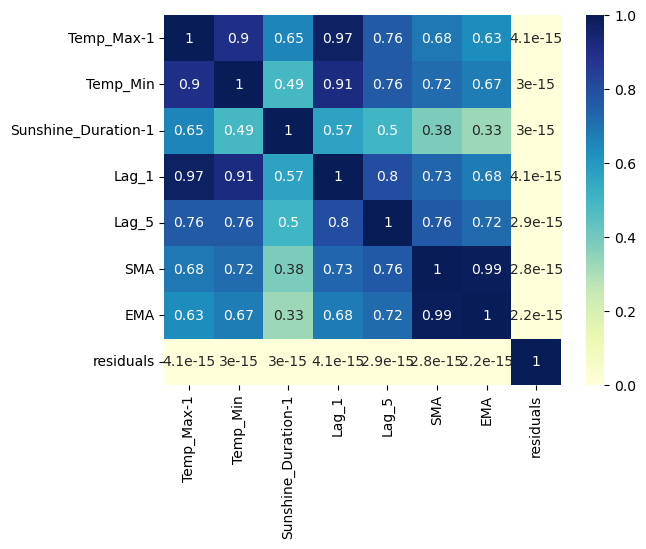

In [93]:
resid_corr2 = pd.DataFrame({"Temp_Max-1":X["Temp_Max-1"],"Temp_Min":X["Temp_Min"],"Sunshine_Duration-1":X["Sunshine_Duration-1"],"Lag_1":X["Lag_1"],"Lag_5":X["Lag_5"],"SMA":X["SMA"],"EMA":X["EMA"],"residuals":residuals2})
matrix = resid_corr2.corr()
# Plot correlation heatmap
sns.heatmap(matrix, cmap="YlGnBu", annot=True)

Text(0.5, 0, 'Date')

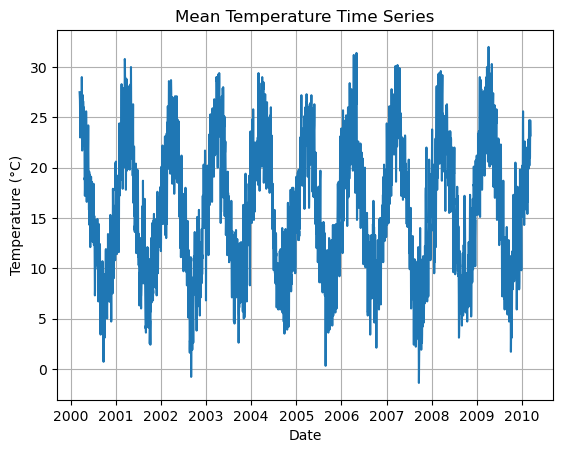

In [94]:

plt.plot(Temp_Mean_Features.iloc[0:3650].index, Data["Temp_Mean"].iloc[0:3650],label="Original Data")
plt.title("Mean Temperature Time Series")
plt.grid()
plt.ylabel("Temperature (\u00B0C)")
plt.xlabel("Date")